#### In this assignment, you will continue to study the data of the US Education System (dataset). In this dataset, there is a lot of data on an annual basis. You can reach the explanations of this data from Kaggle again.

#### To complete this assignment, submit the Github link of the Jupyter notebook file containing solutions to the questions below. You can talk to your mentor on your head or ask Slack at office time.

#### First of all, apply the most appropriate one of the techniques for completing the missing values in your previous lesson. In order to answer the following questions, you must overcome the missing data.

#### 1-Interpret the data by making univariate analysis and indicate the points you consider important.


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from scipy.stats.mstats import winsorize
import warnings


warnings.filterwarnings('ignore')
df = pd.read_csv('data/StudentsPerformance.csv',  low_memory=False)

In [3]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [4]:
df.describe(include=['O'])

,gender,race/ethnicity,parental level of education,lunch,test preparation course
count,1000,1000,1000,1000,1000
unique,2,5,6,2,2
top,female,group C,some college,standard,none
freq,518,319,226,645,642


In [5]:
df.head(100)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
95,male,group C,associate's degree,free/reduced,completed,78,81,82
96,male,group B,some high school,standard,completed,65,66,62
97,female,group E,some college,standard,completed,63,72,70
98,female,group D,some college,free/reduced,none,58,67,62


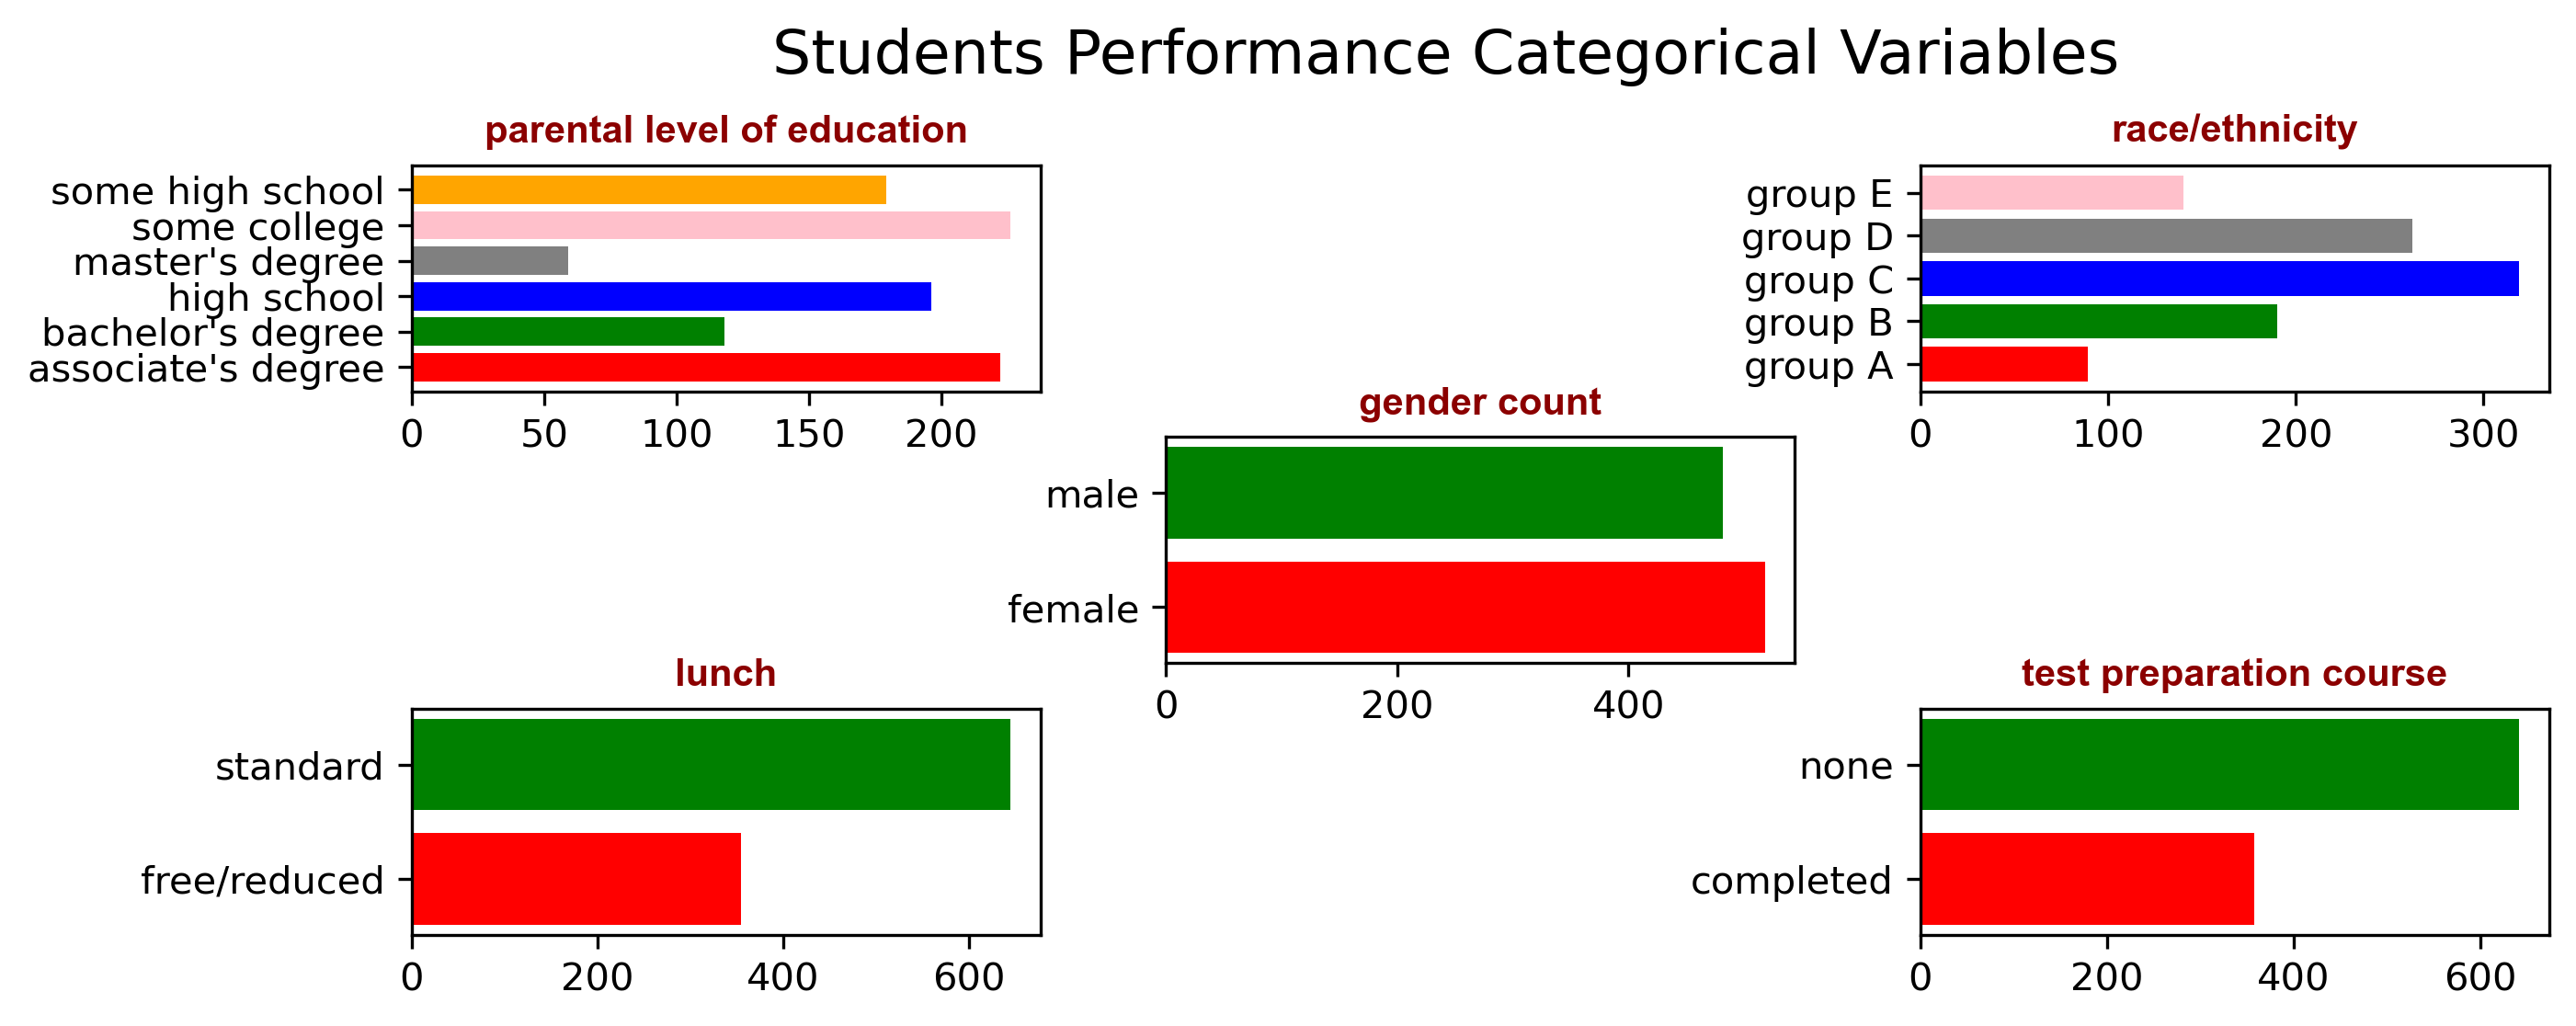

In [6]:
plt.figure(figsize=(10,5), dpi=300)
plt.suptitle('Students Performance Categorical Variables', fontsize=16)


title_font = {'family': 'arial', 'color': 'darkred','weight': 'bold','size': 10 }
axis_font  = {'family': 'arial', 'color': 'darkblue','weight': 'bold','size': 5 }

plt.subplot(4, 3, 1)
plt.barh(df.groupby("parental level of education")["parental level of education"].count().index, 
         df.groupby("parental level of education")["parental level of education"].count(),
         color=["red","green","blue","grey","pink","orange"])
plt.title("parental level of education",fontdict=title_font)


plt.subplot(4, 3, 3)
plt.barh(df.groupby("race/ethnicity")["race/ethnicity"].count().index, 
         df.groupby("race/ethnicity")["race/ethnicity"].count(),
         color=["red","green","blue","grey","pink"])
plt.title("race/ethnicity",fontdict=title_font)

plt.subplot(4, 3, 5)
plt.barh(df.groupby("gender")["gender"].count().index, 
        df.groupby("gender")["gender"].count(), 
        color=["red","green"]),
plt.title("gender count",fontdict=title_font)

plt.subplot(4, 3, 7)
plt.barh(df.groupby("lunch")["lunch"].count().index, 
         df.groupby("lunch")["lunch"].count(),
         color=["red","green","blue","grey","pink","yellow"])
plt.title("lunch",fontdict=title_font)

plt.subplot(4, 3, 9)
plt.barh(df.groupby("test preparation course")["test preparation course"].count().index, 
         df.groupby("test preparation course")["test preparation course"].count(),
         color=["red","green","blue","grey","pink"])
plt.title("test preparation course",fontdict=title_font)


plt.show()



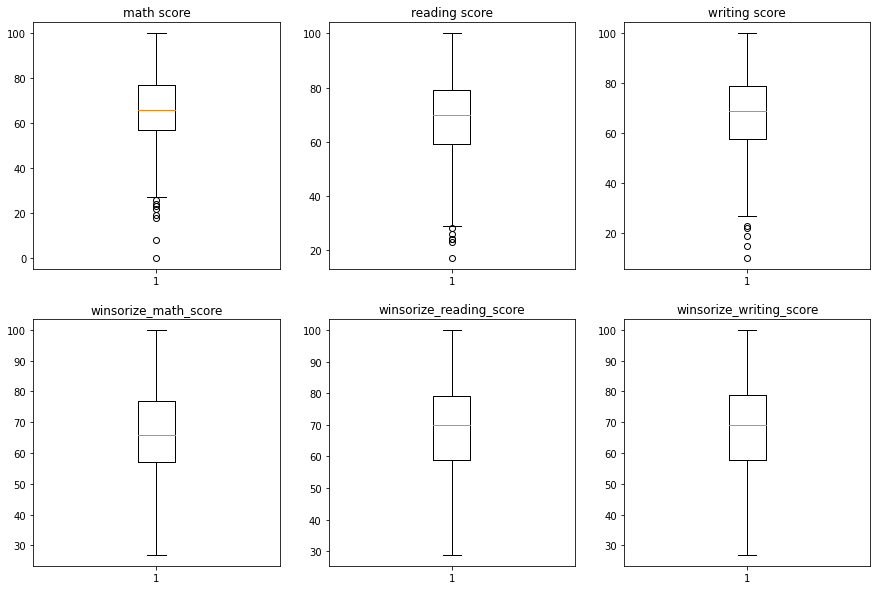

In [7]:
df["winsorize_math_score"] = winsorize(df["math score"], (0.008 , 0))
df["winsorize_reading_score"] = winsorize(df["reading score"], (0.006, 0))
df["winsorize_writing_score"] = winsorize(df["writing score"], (0.005, 0))
pd.options.display.float_format = '{:.3f}'.format


plt.figure(figsize=(15,10))

plt.subplot(2, 3, 1)
plt.boxplot(df["math score"])
plt.title("math score")
          
plt.subplot(2, 3, 2)
plt.boxplot(df["reading score"])
plt.title("reading score")

plt.subplot(2,3, 3)
plt.boxplot(df["writing score"])
plt.title("writing score")

plt.subplot(2, 3, 4)
plt.boxplot(df["winsorize_math_score"])
plt.title("winsorize_math_score")
          
plt.subplot(2, 3, 5)
plt.boxplot(df["winsorize_reading_score"])
plt.title("winsorize_reading_score")

plt.subplot(2,3, 6)
plt.boxplot(df["winsorize_writing_score"])
plt.title("winsorize_writing_score")
plt.show()

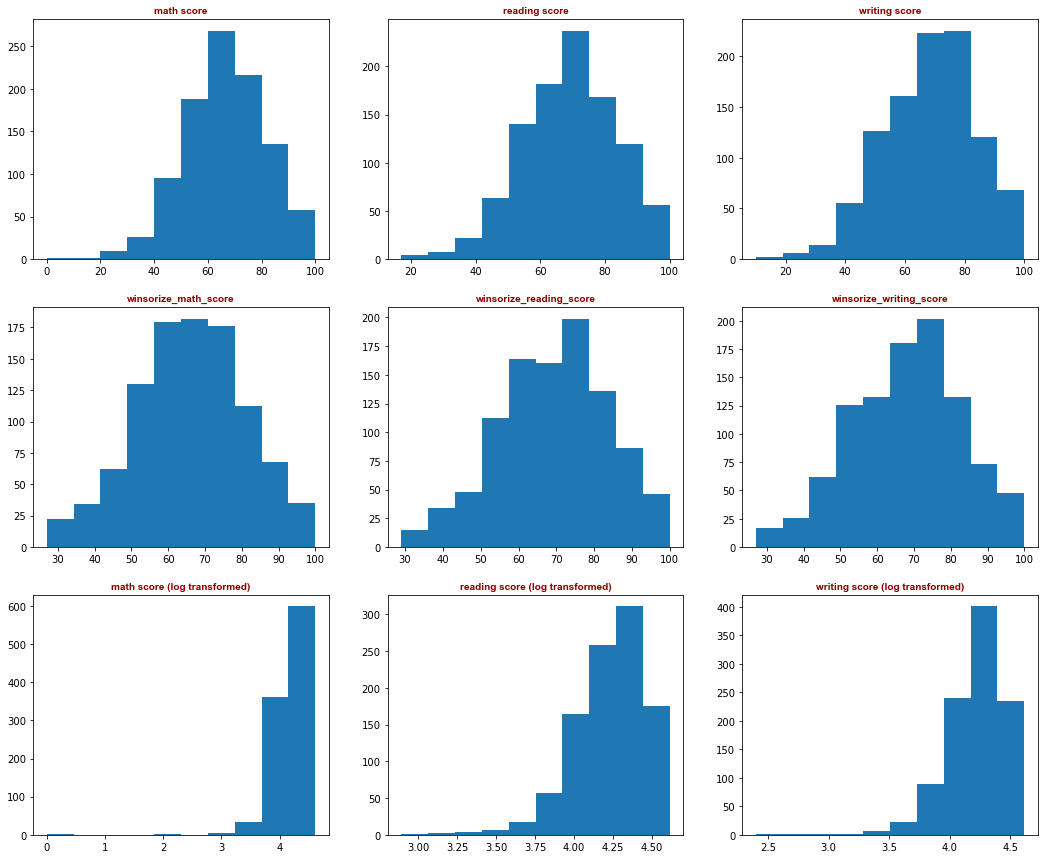

In [8]:
plt.figure(figsize=(18,15))




variables = ['math score','reading score','writing score']
winsorize_variables= ['winsorize_math_score', 'winsorize_reading_score', 'winsorize_writing_score']

for i in range(3):
    plt.subplot(3, 3, i+1)
    plt.hist(df[variables[i]])
    plt.title(variables[i], fontdict=title_font)
    
for i in range(3):
    plt.subplot(3, 3, i+4)
    plt.hist(df[winsorize_variables[i]])
    plt.title(winsorize_variables[i], fontdict=title_font)
    
for i in range(3):
    plt.subplot(3, 3, i+7)
    plt.hist(np.log(df[variables[i]].values+1))
    plt.title(variables[i]+' (log transformed)', fontdict=title_font)

 

#### 2-Consider a state (eg California) and plot the yearly change of total revenues and total spending. Do these two variables change by years? Do you have years of summit and bottom?
 



In [10]:

df2 = pd.read_csv('data/datasets_95317_1078789_states_all.csv',  low_memory=False)

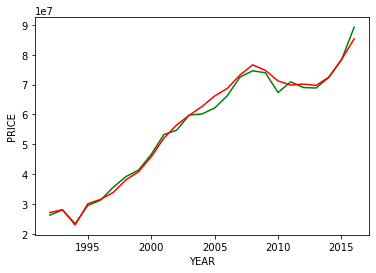

In [41]:
x = df2["YEAR"][df2['STATE']=='CALIFORNIA']
y_1 = df2["TOTAL_REVENUE"][df2['STATE']=='CALIFORNIA']
y_2 = df2["TOTAL_EXPENDITURE"][df2['STATE']=='CALIFORNIA']




plt.plot(x, y_1, c = "GREEN")
plt.plot(x, y_2, c = "RED")

plt.xlabel("YEAR")
plt.ylabel("PRICE")

plt.show()

#### 3-In which course are students more successful in your chosen state? Mathematics or reading?
 



In [14]:
df2.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,nan,2678885.000,304177.000,1659028.000,715680.000,2653798.000,1481703.000,...,57948.000,58025.000,41167.000,nan,nan,731634.000,208.000,252.000,207.000,nan
1,1992_ALASKA,ALASKA,1992,nan,1049591.000,106780.000,720711.000,222100.000,972488.000,498362.000,...,9748.000,8789.000,6714.000,nan,nan,122487.000,nan,nan,nan,nan
2,1992_ARIZONA,ARIZONA,1992,nan,3258079.000,297888.000,1369815.000,1590376.000,3401580.000,1435908.000,...,55433.000,49081.000,37410.000,nan,nan,673477.000,215.000,265.000,209.000,nan
3,1992_ARKANSAS,ARKANSAS,1992,nan,1711959.000,178571.000,958785.000,574603.000,1743022.000,964323.000,...,34632.000,36011.000,27651.000,nan,nan,441490.000,210.000,256.000,211.000,nan
4,1992_CALIFORNIA,CALIFORNIA,1992,nan,26260025.000,2072470.000,16546514.000,7641041.000,27138832.000,14358922.000,...,418418.000,363296.000,270675.000,nan,nan,5254844.000,208.000,261.000,202.000,nan


#### 4-What is the distribution of mathematics and reading grades?
 


In [76]:
print("reading score")
print(df["reading score"].describe())

print("----")
print("math score")
print(df["math score"].describe())


# Reading score more succesfull

reading score
count   1000.000
mean      69.169
std       14.600
min       17.000
25%       59.000
50%       70.000
75%       79.000
max      100.000
Name: reading score, dtype: float64
----
math score
count   1000.000
mean      66.089
std       15.163
min        0.000
25%       57.000
50%       66.000
75%       77.000
max      100.000
Name: math score, dtype: float64



#### 5-You may have noticed that there are many missing values in the mathematics and reading notes. Complete the missing values with mean, median, and interpolation. Compare the impact of these techniques on the distribution of grades.

In [79]:
df[df["math score"].isnull()]  #????????? 

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,winsorize_math_score,winsorize_reading_score,winsorize_writing_score
